### Basic import

In [1]:
import os
from windrose import WindroseAxes 
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### User Configuration

In [2]:

RAW_CSV_PATH = f'../data/benin-malanville.csv'
CLEAN_CSV_PATH = f'../data/benin-malanville_clean.csv'

In [3]:
data = pd.read_csv(RAW_CSV_PATH)
data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

### Summary Statistics

In [4]:
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


### Missing-Value Report

In [5]:
missing_counts = data.isnull().sum()
missing_counts

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [6]:
missing_percent = (missing_counts/len(data))*100
more_than_5_missing = missing_percent[missing_percent>5]
print(f'Columns with > 5% Missing values: {more_than_5_missing}')

Columns with > 5% Missing values: Comments    100.0
dtype: float64


In [7]:
clean_data = data.drop(['Comments'], axis=1)
clean_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

### Columns to check for missing values and outliers

In [8]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing_counts = clean_data[key_cols].isnull().sum()
missing_counts

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

In [9]:
z_scores = np.abs(stats.zscore(clean_data[key_cols]))
outlier_flags = (z_scores > 3).any(axis=1)
clean_data['Outlier_flag'] = outlier_flags
print('Number of outlier rows detected:', outlier_flags.sum())
outliers = clean_data[clean_data['Outlier_flag']]
outliers.head()

Number of outlier rows detected: 7740


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Outlier_flag
670,2021-08-09 11:11,836.0,235.0,610.6,778.8,783.8,30.3,68.2,3.2,4.1,0.7,190.5,18.4,999,0,0.0,63.0,52.7,True
671,2021-08-09 11:12,1274.0,698.8,615.2,1210.3,1210.3,30.1,69.6,3.4,4.1,0.6,175.8,13.3,999,0,0.0,63.7,53.1,True
672,2021-08-09 11:13,938.0,340.1,612.8,891.1,891.1,30.4,68.4,3.4,4.6,0.9,171.5,11.9,999,0,0.0,65.8,54.3,True
673,2021-08-09 11:14,718.5,126.8,593.2,682.6,682.6,30.6,68.2,4.7,5.6,0.6,160.7,8.0,999,0,0.0,65.4,54.2,True
674,2021-08-09 11:15,1349.0,771.8,618.0,1281.5,1281.5,30.9,67.1,4.0,4.6,0.4,169.1,12.3,999,0,0.0,65.0,53.5,True


### handling missing values

In [10]:
clean_data[key_cols] = clean_data[key_cols].fillna(data[key_cols].median())


### Data Saving

In [11]:
os.makedirs('data', exist_ok=True) # Make sure folder data is exist
clean_data.to_csv(CLEAN_CSV_PATH, index=False)
print(f'DAta saved to {CLEAN_CSV_PATH}')

DAta saved to ../data/benin-malanville_clean.csv


#### Time Series Analysis

c:\Users\PC\Documents\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


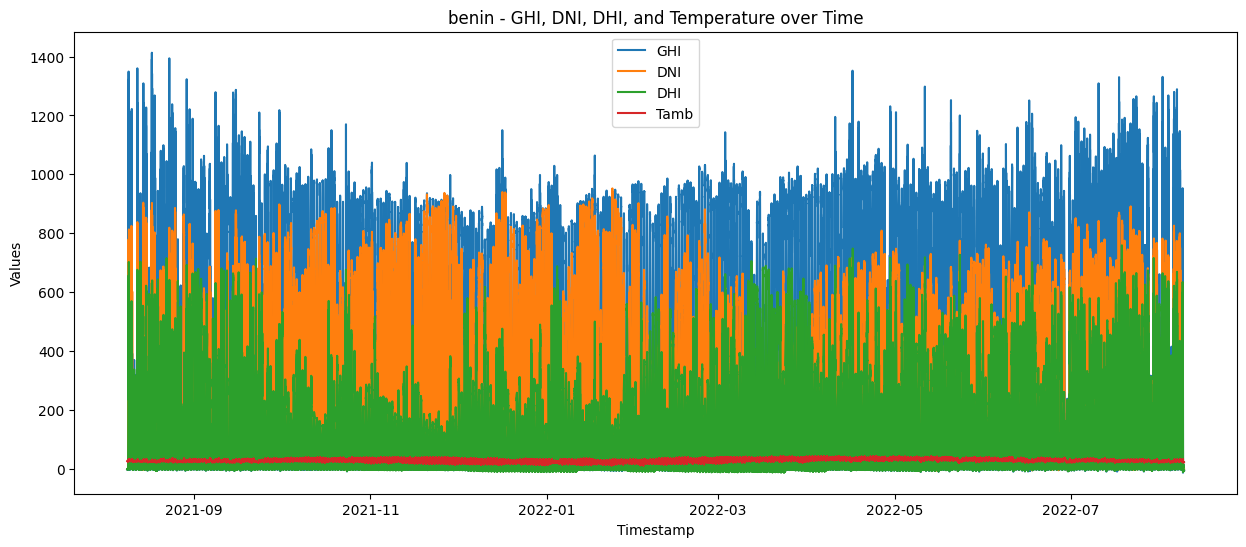

In [12]:
clean_data['Timestamp'] = pd.to_datetime(clean_data['Timestamp'])
clean_data = clean_data.sort_values('Timestamp')
plt.figure(figsize=(15,6))

sns.lineplot(x='Timestamp', y='GHI', data=clean_data, label='GHI')
sns.lineplot(x='Timestamp', y='DNI', data=clean_data, label='DNI')
sns.lineplot(x='Timestamp', y='DHI', data=clean_data, label='DHI')
sns.lineplot(x='Timestamp', y='Tamb', data=clean_data, label='Tamb')
plt.ylabel("Values")
plt.xlabel("Timestamp")
plt.title("benin - GHI, DNI, DHI, and Temperature over Time")
plt.show()

### Observation patterns by month

In [13]:

clean_data['Month'] = clean_data['Timestamp'].dt.month
monthly_average = clean_data.groupby(['Month'])[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
monthly_average

,GHI,DNI,DHI,Tamb
Month,,,,
1,236.127899,223.528044,85.099924,23.328141
2,261.717381,183.575208,123.602111,25.814008
3,246.681272,101.955347,159.999859,31.699034
4,268.759785,160.630734,134.699329,33.773639
5,256.238629,147.091293,135.635515,32.495177
6,232.787537,144.552778,118.637521,29.332551
7,222.814444,130.135970,121.314397,27.329886
8,200.085029,99.048864,122.297982,26.489048
9,222.887431,128.179900,122.124169,27.157532


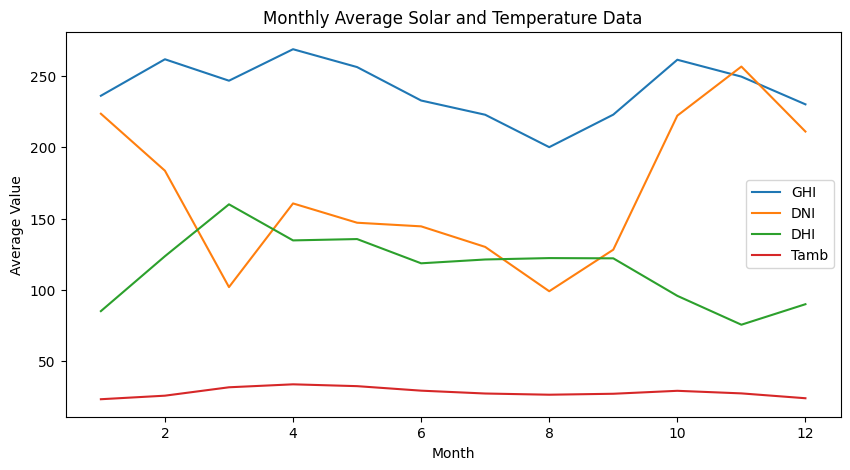

In [14]:
monthly_average.plot(figsize=(10,5))
plt.title("Monthly Average Solar and Temperature Data")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.show()

### Trends throughout the day

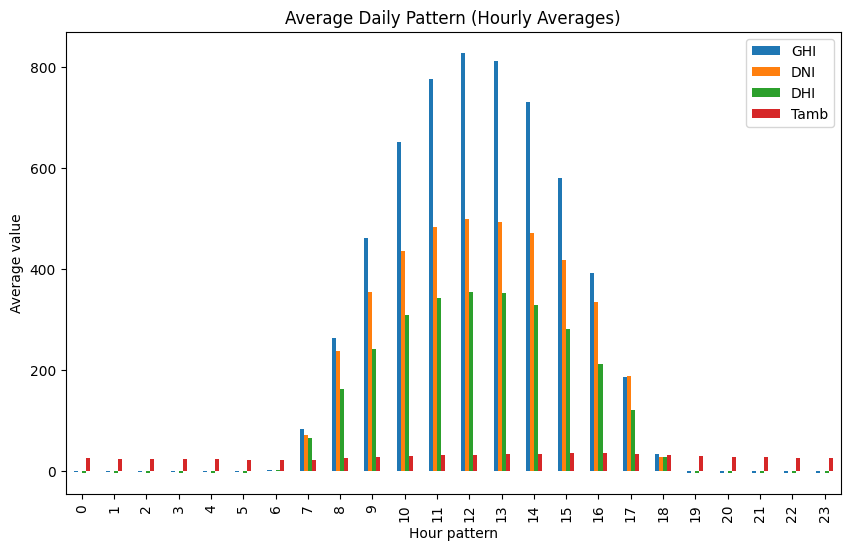

In [15]:
clean_data['Hour'] = clean_data['Timestamp'].dt.hour
hourly_average = clean_data.groupby(['Hour'])[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_average.plot(kind='bar', figsize=(10,6))
plt.title("Average Daily Pattern (Hourly Averages)")
plt.xlabel("Hour pattern")
plt.ylabel("Average value")
plt.show()


### Cleaning Impact

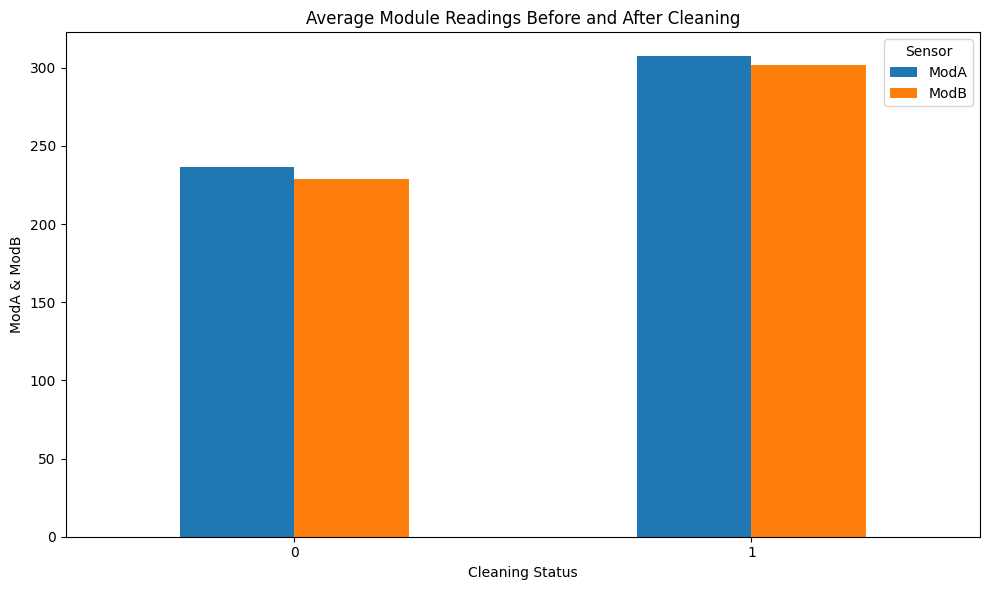

In [16]:
cleaning_flag = clean_data.groupby(['Cleaning'])[['ModA','ModB']].mean()
cleaning_flag.plot(kind='bar', figsize=(10,6))
plt.title("Average Module Readings Before and After Cleaning")
plt.xlabel("Cleaning Status")
plt.ylabel("ModA & ModB")
plt.legend(title="Sensor")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Correlation & Relationship Analysis

In [17]:
cols_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'] # interested columns
corr_of_interest = clean_data[cols_of_interest].corr() #corrlation of interested columns
mask = np.zeros_like(corr_of_interest)
up_tri = np.triu_indices_from(mask)
mask[up_tri] = True     # Masking the upper triange of the correlation

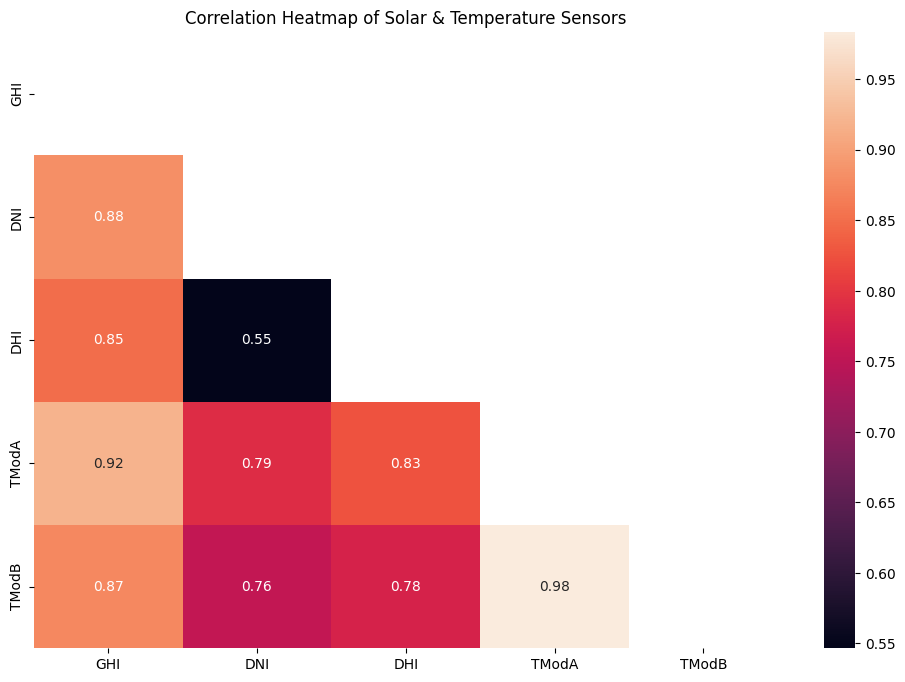

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(data=corr_of_interest, mask=mask, annot=True)
plt.title("Correlation Heatmap of Solar & Temperature Sensors")
plt.show()

### Scatter Plot
#### wind vs. GHI

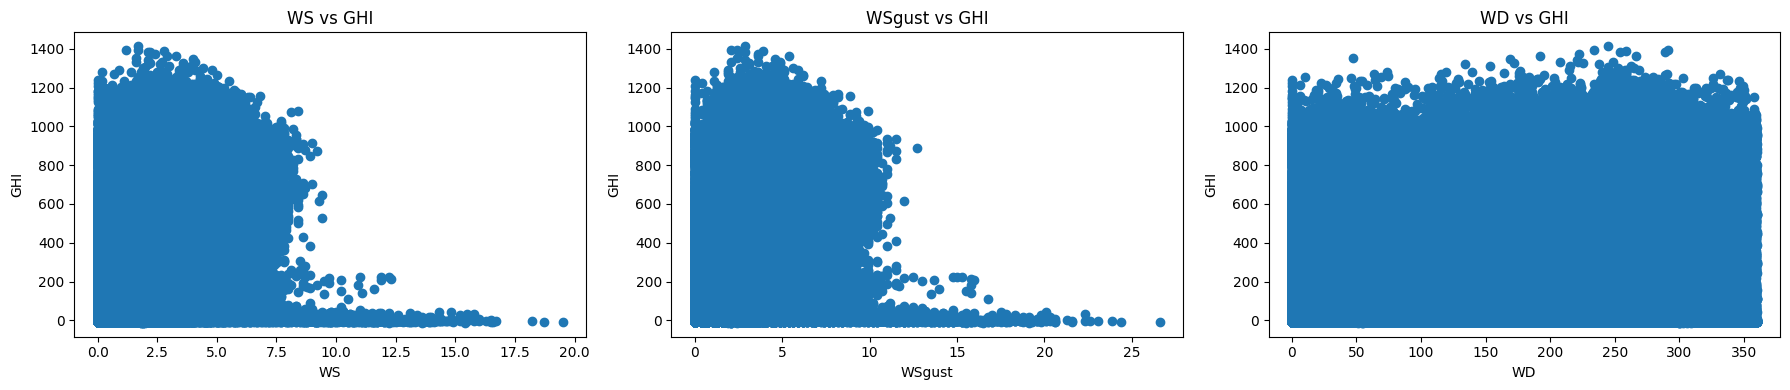

In [19]:
plt.figure(figsize=(18, 4))
plt.subplot(1,3,1)
plt.scatter(clean_data['WS'], clean_data['GHI'])
plt.title("WS vs GHI")
plt.xlabel('WS')
plt.ylabel('GHI')

plt.subplot(1,3,2)
plt.scatter(clean_data['WSgust'], clean_data['GHI'])
plt.title("WSgust vs GHI")
plt.xlabel('WSgust')
plt.ylabel('GHI')

plt.subplot(1,3,3)
plt.scatter(clean_data['WD'], clean_data['GHI'])
plt.title("WD vs GHI")
plt.xlabel('WD')
plt.ylabel('GHI')
plt.tight_layout()
plt.show()

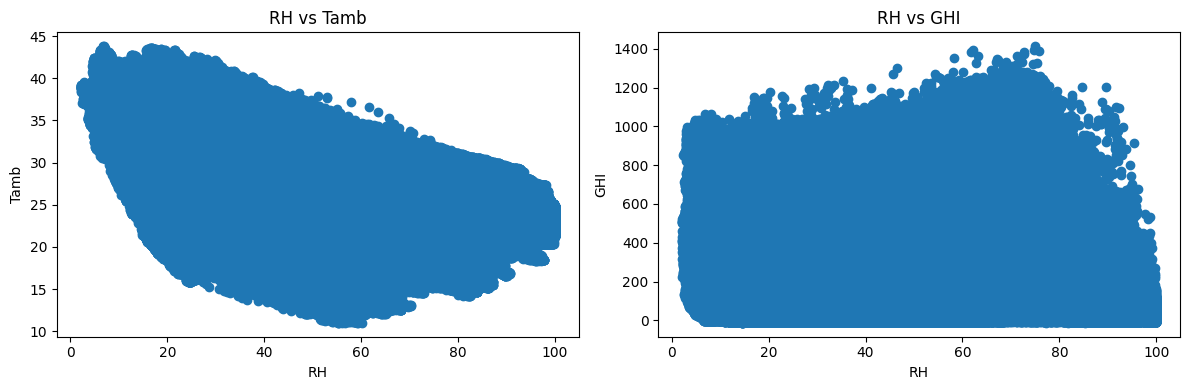

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(clean_data['RH'], clean_data['Tamb'])
plt.title("RH vs Tamb")
plt.xlabel('RH')
plt.ylabel('Tamb')

plt.subplot(1,2,2)
plt.scatter(clean_data['RH'], clean_data['GHI'])
plt.title("RH vs GHI")
plt.xlabel('RH')
plt.ylabel('GHI')
plt.tight_layout()
plt.show()

### Wind  Distribution Analysis

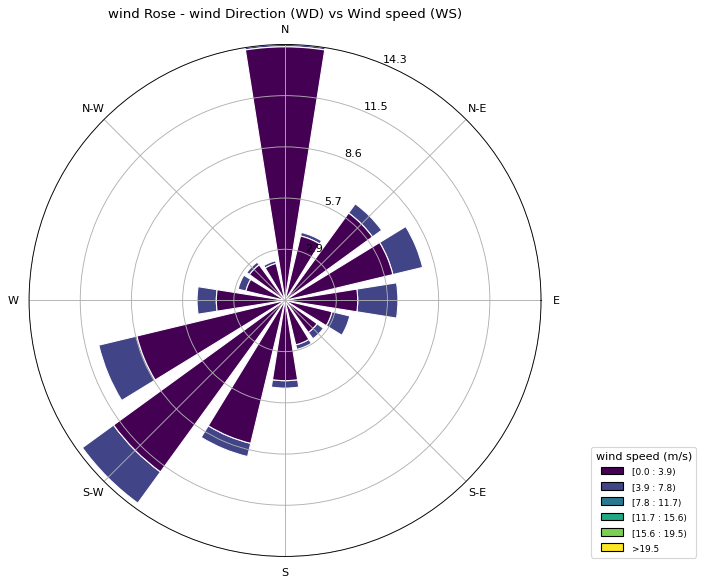

In [21]:
ax = WindroseAxes.from_ax()
ax.bar(clean_data['WD'], clean_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='wind speed (m/s)', bbox_to_anchor=(1.1,0))
plt.title("wind Rose - wind Direction (WD) vs Wind speed (WS)")
plt.show()

### Distribution Analysis (Histograms)

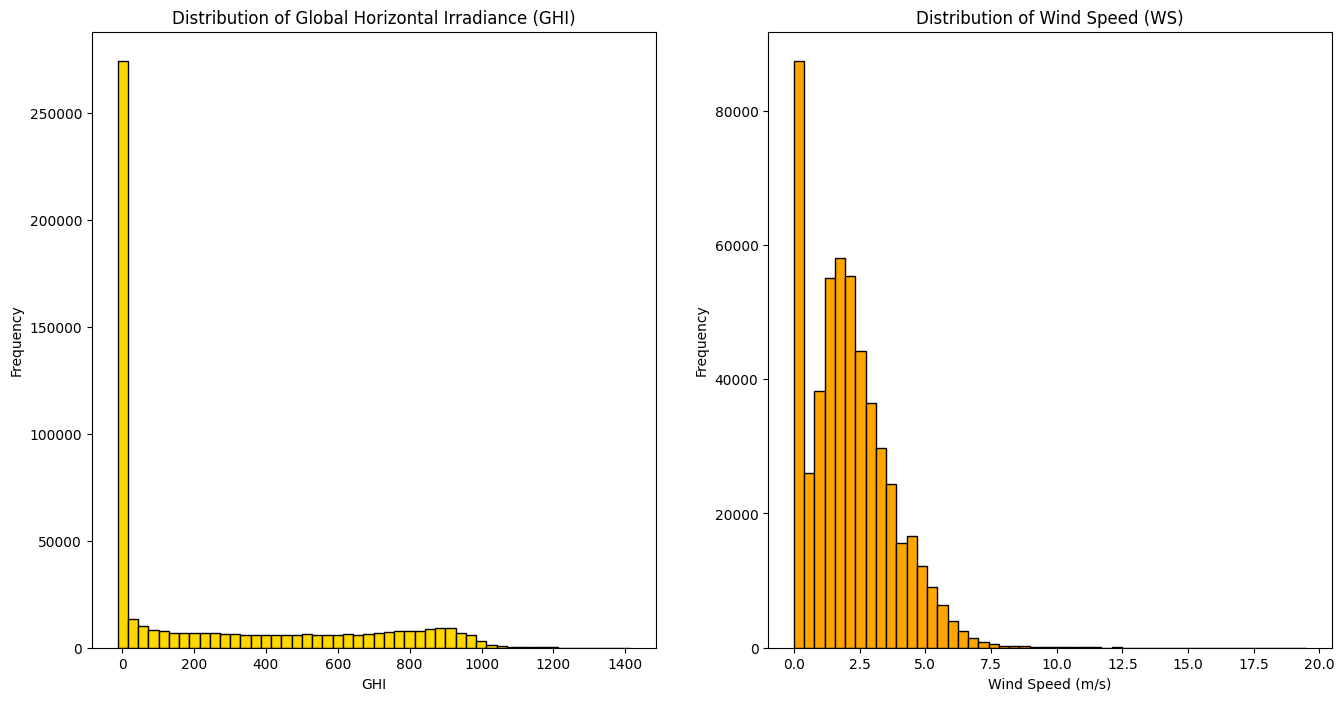

In [22]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.hist(clean_data['GHI'], bins=50, color='gold', ec='black')
plt.title("Distribution of Global Horizontal Irradiance (GHI)")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.hist(clean_data['WS'], bins=50, color='orange', ec='black')
plt.title("Distribution of Wind Speed (WS)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

### Temperature Analysis


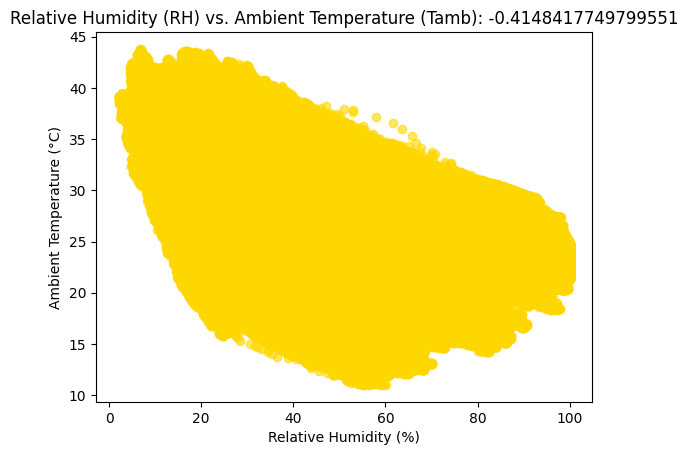

In [23]:
corr_RH_temb = clean_data['RH'].corr(clean_data['Tamb'])
plt.scatter(clean_data['RH'], clean_data['Tamb'], alpha=0.6, c='gold')
plt.title(f"Relative Humidity (RH) vs. Ambient Temperature (Tamb): {corr_RH_temb}")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.show()

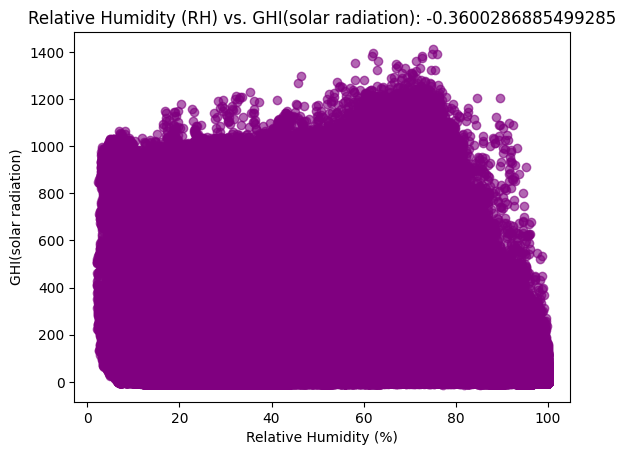

In [24]:
corr_RH_GHI = clean_data['RH'].corr(clean_data['GHI'])
plt.scatter(clean_data['RH'], clean_data['GHI'], alpha=0.6, c='purple')
plt.title(f"Relative Humidity (RH) vs. GHI(solar radiation): {corr_RH_GHI}")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI(solar radiation)")
plt.show()

### Bubble Chart


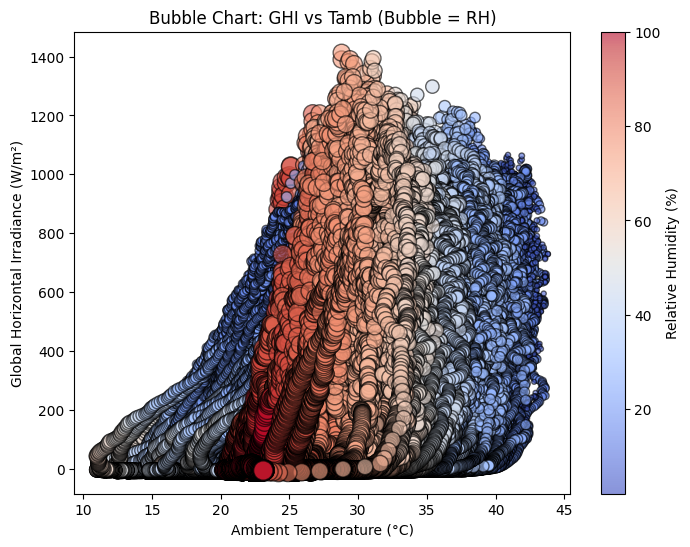

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(        
    clean_data['Tamb'], 
    clean_data['GHI'],          
    s=clean_data['RH']*2,    
    c=clean_data['RH'],        
    cmap='coolwarm',      
    alpha=0.6,            
    edgecolors='black'
)

plt.title("Bubble Chart: GHI vs Tamb (Bubble = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
cbar = plt.colorbar()
cbar.set_label("Relative Humidity (%)")

plt.show()
